<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

[Lecturer]
In this project, you will learn how to fine-tune a BERT model for text classification using TensorFlow and TF-Hub.

The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives [Lecturer]

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites [Lecturer]

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents [Lecturer]

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [1]:
!nvidia-smi

Thu Jul 11 06:35:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Install TensorFlow and TensorFlow Model Garden

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.15.0


In [3]:
!pip install -q tensorflow==2.3.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1)
ERROR: No matching distribution found for tensorflow==2.3.0


In [4]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git
#--depth 1: This option tells git to perform a shallow clone, which means it only retrieves the latest snapshot of the specified branch, rather than the entire history of the repository.
# This makes the cloning process faster and requires less storage space.

fatal: destination path 'models' already exists and is not an empty directory.


In [5]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

  Preparing metadata (setup.py) ... done


## Restart the Runtime

**Note**
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

##### Benefits of Restarting the Runtime (generated by ChatGPT4o)
1. Avoid Conflicts:

New package installations may have dependencies or versions that conflict with currently loaded packages. Restarting the runtime clears all existing states, avoiding such conflicts.

2. Ensure Proper Installation:

Some packages might need a fresh environment to load properly after installation. Restarting ensures that all packages are loaded from scratch with their correct dependencies.

3. Clear Memory:

Restarting clears the memory, removing any residual data or states from previous operations, leading to a clean slate.

4. Stability:

Ensures that the runtime is stable by removing any potential issues caused by changes in the environment or residual states.

##### Why Packages Remain Available After Restarting (generated by ChatGPT4o)
When you install a package in a Jupyter notebook or any interactive environment:

1. Installation on the System Level:

The installation step (pip install) places the packages in the system or virtual environment's package directory. Restarting the runtime does not remove these installed packages; it only restarts the interpreter.

2. Persistence Across Sessions:

Installed packages are available for any session or code cell run after the restart because the installation is not tied to the runtime state but to the environment.

3. Environment Management:

Modern environments and tools like Jupyter notebooks ensure that once a package is installed, it is available for future use without needing reinstallation, provided you are still within the same virtual environment.

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is available


##### Eager Mode in TensorFlow (generated by ChatGPT4o)
Eager Execution is an imperative programming environment that evaluates operations immediately, without building graphs. It is a mode in TensorFlow that allows for more intuitive and flexible coding. Here are the key aspects of eager mode:

1. Immediate Execution:

Operations are executed as they are called from Python, which makes debugging and experimentation more straightforward.

2. No Graphs:

In eager mode, TensorFlow does not build computational graphs. Instead, it evaluates operations immediately, which means you can use Python control flow (e.g., loops, conditionals) naturally.

3. Interactive Development:

Eager execution is particularly useful during development and debugging. It provides immediate feedback, which is helpful for interactive use cases and quick iterations.

A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
                 compression='zip', low_memory=False)
df.shape

(1306122, 3)

In [4]:
df.tail(20)

,qid,question_text,target
1306102,ffff3778790af9baae76,What steps can I take to live a normal life if...,0
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1
1306104,ffff41393389d4206066,Is 33 too late for a career in creative advert...,0
1306105,ffff42493fc203cd9532,What is difference between the filteration wor...,0
1306106,ffff48dd47bee89fff79,"If the universe ""popped"" into existence from n...",0
1306107,ffff5fd051a032f32a39,How does a shared service technology team meas...,0
1306108,ffff6d528040d3888b93,How is DSATM civil engineering?,0
1306109,ffff8776cd30cdc8d7f8,Do you know any problem that depends solely on...,0
1306110,ffff94d427ade3716cd1,What are some comic ideas for you Tube videos ...,0
1306111,ffffa382c58368071dc9,"If you had $10 million of Bitcoin, could you s...",0


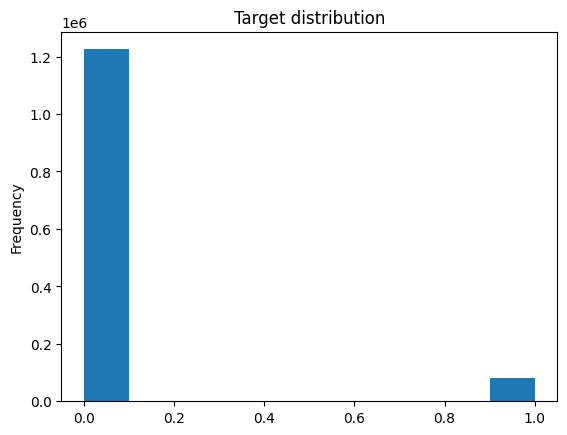

In [5]:
df.target.plot(kind='hist', title='Target distribution');

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [6]:
#to ensure that the stratification is maintained correctly for both splits
#and to control the exact sizes and proportions of the training and validation sets independently
train_df, remaining = train_test_split(df, random_state=42, train_size=0.0075, stratify=df.target.values)
valid_df, _ = train_test_split(remaining, random_state=42, train_size=0.00075, stratify=remaining.target.values)
train_df.shape, valid_df.shape

((9795, 3), (972, 3))

In [7]:
#to increase efficiency, turn the pandas dataframes to tf datasets
with tf.device('/cpu:0'): #specifies that the following operations should be executed on the CPU
  train_data = tf.data.Dataset.from_tensor_slices((train_df.question_text.values, train_df.target.values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df.question_text.values, valid_df.target.values))

#retrieves the first element of the train_data #just to see what the data looks like
for text, label in train_data.take(1):
  print(text)
  print(label)

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


##### Why do we use CPU here, despite running on a GPU-enabled environment like Google Colab? (generated by ChatGPT4o)

1. I/O Bound Operations:

Converting pandas DataFrames to TensorFlow datasets (from_tensor_slices) and inspecting the data are I/O-bound operations rather than compute-bound operations. These tasks involve data manipulation and memory operations which are more efficiently handled by the CPU.

2. Efficiency in Data Handling:

CPUs are generally more efficient for data loading and preprocessing tasks that involve handling data in memory. The overhead of transferring data between CPU and GPU can be avoided by performing these operations directly on the CPU. "The overhead of transferring data between CPU and GPU" refers to the time and resources required to move data from the computer's main memory (which is managed by the CPU) to the GPU's memory (and vice versa). This transfer is necessary when the data needs to be processed by the GPU, but it can introduce significant delays and resource consumption.

3. GPU Utilization:

The GPU should be reserved for computationally intensive tasks such as model training and inference. By keeping the data loading and preprocessing on the CPU, the GPU remains fully available for tasks where it can provide the most benefit.

## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [8]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list = [0, 1] # Label categories # binary classification
max_seq_length = 128 # maximum length of (token) input sequences #a standard value #adjust based on model performance and resource constraints
train_batch_size = 32 #a standard value #adjust based on model performance and resource constraints

# Get the pretrained BERT layer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable=True)

# retrieves BERT model-specific information
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy() #=True

# initialize the tokenizer to preprocess text data into the format required by the BERT model
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

'''
1. hub.KerasLayer: This function from TensorFlow Hub is used to load a pre-trained model as a Keras layer.
2. The URL "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2" points to a specific version of the BERT model.
   This model is the "BERT base" model with 12 layers, 768 hidden units per layer, and 12 attention heads.
3. trainable=True: This parameter indicates that the BERT model's weights should be updated during training, allowing for fine-tuning on your specific task.
'''

'\n1. hub.KerasLayer: This function from TensorFlow Hub is used to load a pre-trained model as a Keras layer.\n2. The URL "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2" points to a specific version of the BERT model.\n   This model is the "BERT base" model with 12 layers, 768 hidden units per layer, and 12 attention heads.\n3. trainable=True: This parameter indicates that the BERT model\'s weights should be updated during training, allowing for fine-tuning on your specific task.\n'

In [9]:
# a sentence-to-tokens example
tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?')

['hi', '##,', 'how', 'are', 'you', 'doing', '##?']

In [10]:
# a sentence-to-token-ids example
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('hi, how are you doing?'))

[7632, 29623, 2129, 2024, 2017, 2725, 29632]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

##### Outputs of the BERT tokenizer (generated by ChatGPT4o)
1. Token IDs: The tokenized representation of the input text. See example in the code cells above.
2. Input Mask: The mask indicating which tokens are actual text (as 1) and which are padding (as 0). The input mask is a sequence of 1s and 0s, where 1 indicates a valid token and 0 indicates padding. This helps the BERT model differentiate between actual tokens and padding tokens, especially when dealing with sentences of varying lengths.
e.g.
Tokens:      [CLS] I love natural language processing . [SEP] [PAD] [PAD] [PAD]
Token IDs:   [101] [1] [2] [3] [4] [5] [6] [102] [0] [0] [0]
Input Mask:  [1]   [1] [1] [1] [1] [1] [1] [1]  [0] [0] [0]

3. Input Type IDs (aka segment IDs): The IDs indicating different segments of text for tasks involving multiple sentences. In tasks where BERT needs to differentiate between two sentences (e.g., question-answering tasks), input type IDs are used.
e.g.
question and answer combined input text:
[CLS] What is the capital of France? [SEP] Paris is the capital of France. It is known for its cafes and the Eiffel Tower. [SEP]

input type ids:
[0]  0   0  0  0    0    0    0  [0]  1   1    1    1      1   1  1   1  1   1  1    1     1    1     1 [1]

CLS: classification, SEP: seperator

In [11]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None, #unique id for each example; here we're working on 1 example at a time, so we don't need this
                                            text_a = text.numpy(), #text to classify; getting the value of the tensor, the format the text is in
                                            text_b = None, #text to match for next word prediction; but here we're doing a sentence classification, so we don't need this
                                            label = label.numpy()) #get a label for this example

  feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer) #0 indicates the first example; here we're working on 1 example at a time, so each example is the first example

  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

 The .numpy() method is eager execution and requires the code to be executed within a Python function, not in a TensorFlow graph context.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow operation for Eager Execution

In [12]:
'''
The tf.py_function function allows you to wrap arbitrary Python code
so that it can be used in TensorFlow operations, particularly within tf.data.Dataset.map.
'''
# pyton function 'to_feature' --> TensorFlow operation 'to_feature_map'
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label],
                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])
                                #Tout, i.e. specified each Tensor output type as a 32-bit binary digits signed integer
                                # The range of values that a 32-bit signed integer can represent is from -2,147,483,648 to 2,147,483,647.
                                # +/- (2^31) -1

  # tf.py_function doesn't set the shape of the returned tensors, so we need to do so here:
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([]) #the labels are not constrained to any shape

  x = {
        'input_word_ids': input_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
    }
  y = label_id

  return (x, y) # i.e. (inputs, target label)
'''
When defining a model in TensorFlow using the Keras API, the model typically expects a dictionary of inputs.
For example: model.fit(x={'input_word_ids': ..., 'input_mask': ..., 'input_type_ids': ...}, y=...)
That's a major reason why we are bundling x and returning (x,y) here.
'''

"\nWhen defining a model in TensorFlow using the Keras API, the model typically expects a dictionary of inputs.\nFor example: model.fit(x={'input_word_ids': ..., 'input_mask': ..., 'input_type_ids': ...}, y=...)\nThat's a major reason why we are bundling x and returning (x,y) here.\n"

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [13]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE) #optimal nuber of parallel call
                          .shuffle(1000) #buffer_size=1000 for shuffling #ensure that each mini-batch of data is a random sample from the entire dataset
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE)) #reduces the step time to the maximum

  # valid
  valid_data = (valid_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(32, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

##### Why do we do .shuffle(1000) here in the train_data? (generated by ChatGPT4o)
The dataset.shuffle(buffer_size=1000) call shuffles the dataset using a buffer of size 1000. This means that at any point during the shuffling process, TensorFlow maintains a buffer of 1000 elements from which it randomly selects the next element. After shuffling, the dataset is batched and prefetched to prepare it for efficient training.

1. Randomization:

Shuffling introduces randomness to the order of the data. This randomness helps ensure that the model does not learn the order of the data, which can lead to overfitting.

2. Training Stability:

By shuffling the data, you ensure that each mini-batch of data is a random sample from the entire dataset. This improves the statistical properties of the batches, leading to more stable and efficient training.

3. Avoiding Bias:

Without shuffling, if there is any inherent order in the data (e.g., all positive samples followed by all negative samples), the model might learn to exploit this order, leading to poor generalization. Shuffling helps in mixing the data, ensuring that each batch contains a good mix of different types of samples.

##### Why not also do .shuffle(1000) in the valid_data? (generated by ChatGPT4o)
Shuffling the training data is crucial for ensuring that the model generalizes well and does not learn the order of the data. However, shuffling the validation data is typically not necessary and might even be counterproductive. Here's why:

1. Consistency in Evaluation:

During training, it's essential to evaluate the model's performance consistently on the same validation data. If the validation data is shuffled, the order of the samples changes in each epoch, which can lead to variations in validation performance due to different batches, making it harder to track the model's progress.

2. Reproducibility:

For reproducible results, you want the validation set to remain the same across different training runs. Shuffling the validation data can introduce variability, making it challenging to compare results from different runs.

3. Sequential Data:

If your data is sequential (like time-series data), the order of the validation data might be significant. Shuffling could destroy any inherent temporal relationships present in the validation set.

4. Validation as a Static Benchmark:

The validation set acts as a static benchmark to measure how well the model is performing. Keeping it unshuffled ensures that the evaluation metric reflects the model's performance on a fixed set of samples, providing a reliable measure of progress.

##### Why do we use CPU here, despite running on a GPU-enabled environment like Google Colab? (generated by ChatGPT4o)

1. Efficiency of Data Pipeline:

Data preprocessing tasks, such as mapping functions, shuffling, batching, and prefetching, often do not benefit significantly from GPU acceleration. These operations are typically I/O-bound rather than computation-bound. Using the CPU for these tasks can free up the GPU for the more computationally intensive tasks, such as model training and inference.

2. Parallelization:

The TensorFlow data pipeline can leverage multiple CPU cores for parallel processing of data. This can improve the throughput of the data pipeline, ensuring that the GPU always has data ready to process. By dividing the data processing tasks among multiple CPU cores, TensorFlow can handle several data processing operations simultaneously. This includes tasks like reading data from disk, applying transformations, tokenizing text, and batching.

- prefetching data:
While one batch of data is being processed by the GPU, the next batch is being prepared in parallel by the CPU.
This overlapping of data preparation and processing ensures smooth and continuous data flow.

- num_parallel_calls=tf.data.experimental.AUTOTUNE:
This argument allows TensorFlow to automatically choose the optimal number of parallel calls based on the available CPU resources.

3. GPU Utilization:

Keeping the GPU focused on training and inference can maximize its utilization for the tasks it is best suited for. This helps in achieving better performance and faster training times.

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [14]:
# data spec
train_data.element_spec

'''
Tensor shape = (32, 128):
meaning it contains batches of 32 samples, each of which is a sequence of 128 integers,
as specified in the previous code cells.
'''

'\nTensor shape = (32, 128):\nmeaning it contains batches of 32 samples, each of which is a sequence of 128 integers,\nas specified in the previous code cells.\n'

In [15]:
# data spec
valid_data.element_spec

({'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [ ]:
# Building the model
def create_model():  #copy-pasted the BERT layers from the BERT documentation
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

#add a dropout layer to minimize overfitting on the training set
  drop = tf.keras.layers.Dropout(0.4)(pooled_output)
  output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(drop) #binary classification

  model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output)
  return model

## Task 10: Fine-Tune BERT for Text Classification

In [ ]:
# Compile the model: BERT with a binary class classification head
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_word_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 input_mask (InputLayer)     [(None, 128)]                0         []                            
                                                                                                  
 input_type_ids (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                              

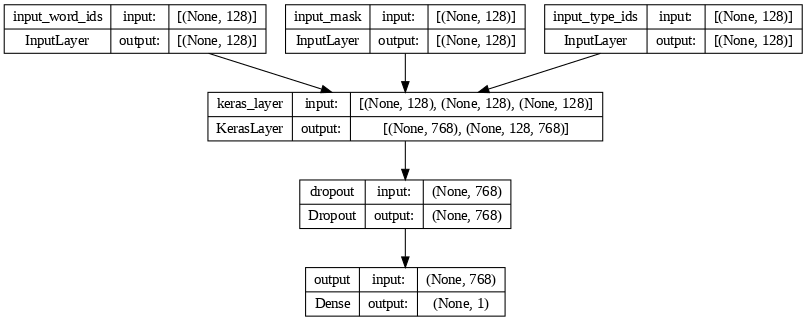

In [ ]:
# Visualize the structure of the model
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76, )

In [ ]:
# Train, i.e. fine-tune, the model
epochs = 4
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)

'''
Yes, training the BERT model with a binary classification head using labeled, binary classified text data
does indeed equate to fine-tuning BERT for a binary text classification task.
'''

Epoch 1/4
306/306 [==============================] - 305s 839ms/step - loss: 0.1676 - binary_accuracy: 0.9394 - val_loss: 0.1273 - val_binary_accuracy: 0.9531
Epoch 2/4
306/306 [==============================] - 259s 841ms/step - loss: 0.0981 - binary_accuracy: 0.9632 - val_loss: 0.1382 - val_binary_accuracy: 0.9469
Epoch 3/4
306/306 [==============================] - 257s 836ms/step - loss: 0.0465 - binary_accuracy: 0.9838 - val_loss: 0.1752 - val_binary_accuracy: 0.9563
Epoch 4/4
306/306 [==============================] - 258s 842ms/step - loss: 0.0269 - binary_accuracy: 0.9907 - val_loss: 0.1787 - val_binary_accuracy: 0.9542


'\nYes, training the BERT model with a binary classification head using labeled, binary classified text data \ndoes indeed equate to fine-tuning BERT for a binary text classification task.\n'

##### Fine-Tuning Specialization (generated by ChatGPT4o)
The pre-trained BERT model already has a general understanding of language due to its extensive pre-training on a diverse corpus. This general knowledge helps the model understand and process new text to some extent.

While, fine-tuning narrows down this general knowledge to specialize in the specific patterns and features of the training data for the binary classification task. This means the model is highly tuned to the characteristics of the training data, but this fine-tuning also makes it less flexible for drastically different text data. For example, a model trained on formal business emails for spam detection might not perform as well on casual social media posts or technical documents without additional fine-tuning on this new data.

##### Practical Implications
1. Adaptability: If you need the model to work well on a different but related domain, additional fine-tuning on data from that new domain can help improve performance.

2. Evaluation: It’s important to evaluate the model on a validation set that is representative of the data it will encounter in production to understand its performance and generalization capabilities.

## Task 11: Evaluate the BERT Text Classification Model

In [16]:
import matplotlib.pyplot as plt

#to plot the training and validation performance metrics over the training epochs
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

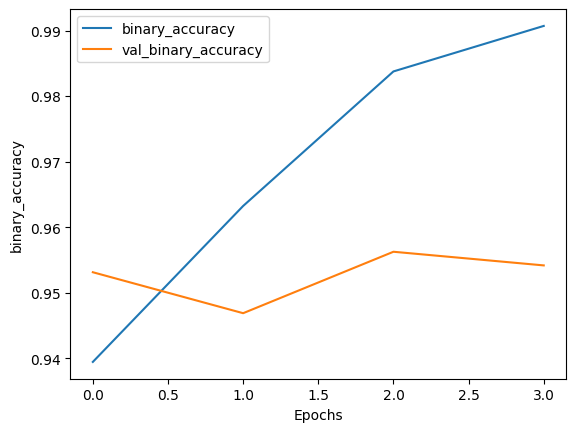

In [ ]:
plot_graphs(history, 'binary_accuracy')
# blue: training binary accuracy; orange: validation binary accuracy

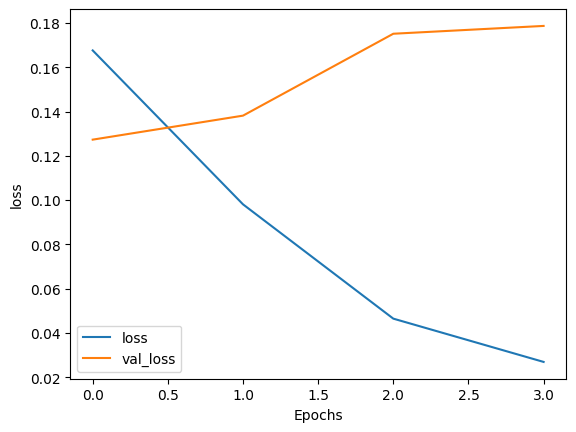

In [ ]:
plot_graphs(history, 'loss')
# blue: training loss; orange: validation loss

##### How not to overfit?

In [ ]:
model.evaluate(valid_data, verbose=1) #returns a list of loss and binary accuracy

30/30 [==============================] - 9s 284ms/step - loss: 0.1787 - binary_accuracy: 0.9542


[0.17868950963020325, 0.9541666507720947]

In [ ]:
sample_example = ["What is your email address?",
                  "Are you ashamed of being an Asain?",
                  "I love animals! How about you?",
                  "Does AI engineering have a good future?",
                  "What's your name?",
                  "Can a job interviewer be racist?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

6/6 [==============================] - 0s 23ms/step


In [ ]:
threshold = 0.5 #between 0 and 1
['Toxic' if pred >=threshold else 'Sincere' for pred in preds]

['Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere']

## Overfitting
Why does the model fail to identify toxic questions like "Are you ashamed of being an Asain?" in the example above? Because of model overfit? Yes, probably. I will need to optimize this model and fix this issue.

## What Overfitting Means (generated by ChatGPT4o)
Overfitting occurs when a machine learning model learns not only the underlying patterns in the training data but also the noise and random fluctuations. This leads to a model that performs exceptionally well on the training data but poorly on new, unseen data. In essence, an overfitted model has memorized the training data rather than learning to generalize from it.

## Indicators of Overfitting (generated by ChatGPT4o)
1. High Training Accuracy but Low Validation Accuracy: The model performs very well on the training set but has significantly lower performance on the validation set.
2. Increasing Validation Loss: While the training loss continues to decrease, the validation loss starts to increase after a certain point.


## Possible Reasons for Overfitting in a Fine-Tuned BERT Model (generated by ChatGPT4o)
1. Complexity of the Model: BERT is a highly complex model with millions of parameters. This high capacity allows it to memorize the training data easily, especially if the training dataset is small.

2. Insufficient Training Data: If the training dataset is not large enough, the model will not have enough variety to learn general patterns. This makes it more likely to overfit the training data.

3. Too Many Training Epochs: Training the model for too many epochs can lead to overfitting, as the model continues to adjust its parameters to fit the training data more closely.

4. Inadequate Regularization: Regularization techniques like dropout and L2 regularization are essential to prevent overfitting. If these are not adequately applied, the model is more likely to overfit.

5. High Learning Rate: A high learning rate can cause the model to converge quickly to a point where it fits the training data very well but fails to generalize.

6. Lack of Data Augmentation: Not using data augmentation can limit the diversity of the training data, making it easier for the model to overfit.

7. Data Leakage: If there is any overlap between the training and validation datasets, the model can overfit to the training data.

## Addressing Overfitting (generated by ChatGPT4o)
1. Increase Dropout: Adding dropout layers with higher rates can help by randomly turning off some neurons during training, forcing the model to learn more robust features.

2. Use Weight Decay (L2 Regularization): This technique penalizes large weights and encourages the model to keep the weights small, preventing it from fitting the training data too closely.

3. Early Stopping: Monitor the validation loss during training and stop training once the validation loss stops improving.

4. Reduce Model Complexity: Use a smaller version of BERT, such as DistilBERT or ALBERT, which has fewer parameters.

5. Increase Training Data: Collect more training data if possible, or use data augmentation techniques to artificially increase the size of the training dataset.

6. Cross-Validation: Use cross-validation to ensure that the model generalizes well across different subsets of the data.

7. Adjust Learning Rate: Lower the learning rate to allow the model to learn more gradually and avoid overfitting.

8. Freeze Some Layers: Freeze some of the layers in the BERT model to reduce the number of trainable parameters.

## Model Optimization First Attempt: Fewer Epochs (Failed)

In [ ]:
# lower the number of epochs to deal with the overfitting issue
epochs = 1 #originally 4
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)

306/306 [==============================] - 14009s 46s/step - loss: 0.1762 - binary_accuracy: 0.9336 - val_loss: 0.1297 - val_binary_accuracy: 0.9531


In [ ]:
sample_example = ["What is your email address?",
                  "Are you ashamed of being an Asain?",
                  "I love animals! How about you?",
                  "Does AI engineering have a good future?",
                  "What's your name?",
                  "Can a job interviewer be racist?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

6/6 [==============================] - 5s 612ms/step


In [ ]:
threshold = 0.5 #between 0 and 1
['Toxic' if pred >=threshold else 'Sincere' for pred in preds]

['Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere']

## Model Optimization Second Attempt: Weight Decay and Early Stopping (Failed)

In [17]:
from transformers import TFBertModel, BertTokenizer, AdamW
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = create_model()

#Added AdamW optimizer with weight decay
optimizer = tf.keras.optimizers.AdamW(learning_rate=2e-5, weight_decay=0.01)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

#Added early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

epochs = 4
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/4
306/306 [==============================] - 318s 874ms/step - loss: 0.1608 - binary_accuracy: 0.9418 - val_loss: 0.1239 - val_binary_accuracy: 0.9573
Epoch 2/4
306/306 [==============================] - 268s 874ms/step - loss: 0.1045 - binary_accuracy: 0.9616 - val_loss: 0.1325 - val_binary_accuracy: 0.9594
Epoch 3/4
306/306 [==============================] - 267s 870ms/step - loss: 0.0617 - binary_accuracy: 0.9794 - val_loss: 0.1296 - val_binary_accuracy: 0.9563


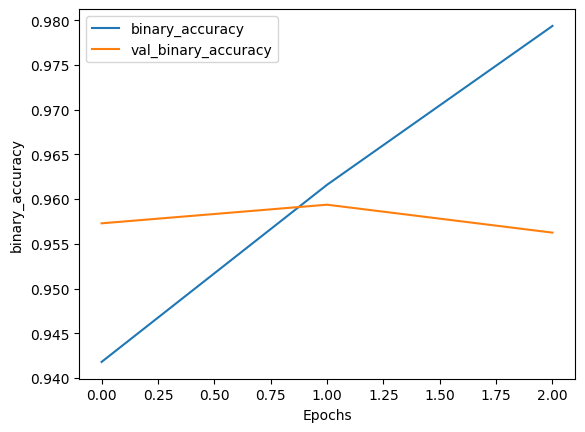

In [ ]:
plot_graphs(history, 'binary_accuracy')
# blue: training binary accuracy; orange: validation binary accuracy

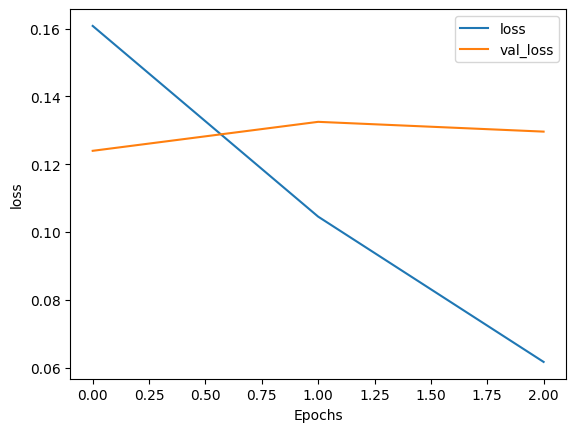

In [ ]:
plot_graphs(history, 'loss')
# blue: training loss; orange: validation loss

In [ ]:
sample_example = ["What is your email address?",
                  "Are you ashamed of being an Asain?",
                  "I love animals! How about you?",
                  "Does AI engineering have a good future?",
                  "What's your name?",
                  "Can a job interviewer be racist?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

6/6 [==============================] - 1s 26ms/step


In [ ]:
threshold = 0.5 #between 0 and 1
['Toxic' if pred >=threshold else 'Sincere' for pred in preds]

['Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere']

## Model Optimization Third Attempt: (Augmented on the Second Attempt) Increased Dropout, Lowered Learning Rate, Added L2 Regularization (Success!)

In [14]:
# Building the model
def create_model():  #copy-pasted the BERT layers from the BERT documentation
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

#add a dropout layer to minimize overfitting on the training set
  drop = tf.keras.layers.Dropout(0.5)(pooled_output) ##originally 0.4
  output = tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(0.01), name="output")(drop) #binary classification ##added L2 regularization

  model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output)
  return model

In [22]:
model = create_model()

#AdamW optimizer with weight decay
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-5, weight_decay=0.01) #originally 2e-5 #decreased to allow the model to learn more slowly

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

epochs = 4
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/4
306/306 [==============================] - 304s 845ms/step - loss: 0.2297 - binary_accuracy: 0.9218 - val_loss: 0.1482 - val_binary_accuracy: 0.9469
Epoch 2/4
306/306 [==============================] - 256s 834ms/step - loss: 0.1357 - binary_accuracy: 0.9580 - val_loss: 0.1408 - val_binary_accuracy: 0.9594
Epoch 3/4
306/306 [==============================] - 256s 833ms/step - loss: 0.1033 - binary_accuracy: 0.9709 - val_loss: 0.1636 - val_binary_accuracy: 0.9510
Epoch 4/4
306/306 [==============================] - 258s 840ms/step - loss: 0.0686 - binary_accuracy: 0.9831 - val_loss: 0.1918 - val_binary_accuracy: 0.9656


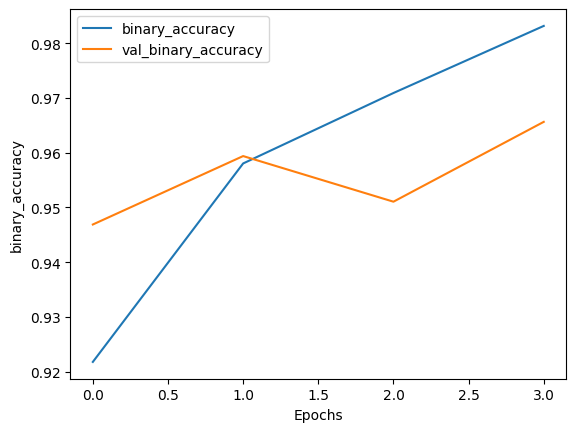

In [23]:
plot_graphs(history, 'binary_accuracy')
# blue: training binary accuracy; orange: validation binary accuracy

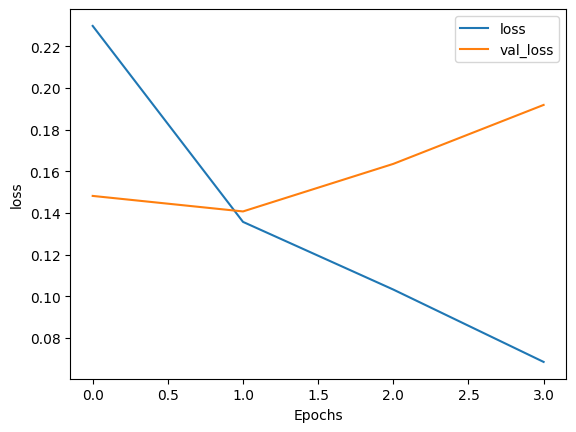

In [24]:
plot_graphs(history, 'loss')
# blue: training loss; orange: validation loss

In [25]:
sample_example = ["What is your email address?",
                  "Are you ashamed of being an Asain?",
                  "I love animals! How about you?",
                  "Does AI engineering have a good future?",
                  "What's your name?",
                  "Can a job interviewer be racist?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

6/6 [==============================] - 1s 23ms/step


In [26]:
threshold = 0.5 #between 0 and 1
['Toxic' if pred >=threshold else 'Sincere' for pred in preds]

['Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere']

##### The model still overfits. However, the time of overfit has significantly shifted from epoch 0.5 to epoch 1. The degree of overfit has also decreased. This indicates that the model is learning much slower and generalizing better.

## Model Operization Attempt Four: (Augmented on Previous Attempts) Reduce Batch Size (Failed)

In [26]:
# Building the model
def create_model():  #copy-pasted the BERT layers from the BERT documentation
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

#add a dropout layer to minimize overfitting on the training set
  drop = tf.keras.layers.Dropout(0.5)(pooled_output) ##originally 0.4
  output = tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(0.01), name="output")(drop) #binary classification ##added L2 regularization

  model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output)
  return model

In [28]:
model = create_model()

#AdamW optimizer with weight decay
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-5, weight_decay=0.01) #originally 2e-5 #decreased to allow the model to learn more slowly

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

epochs = 4
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    batch_size= 8, ##originally 32
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/4
306/306 [==============================] - 311s 852ms/step - loss: 0.1905 - binary_accuracy: 0.9420 - val_loss: 0.1422 - val_binary_accuracy: 0.9583
Epoch 2/4
306/306 [==============================] - 258s 840ms/step - loss: 0.1310 - binary_accuracy: 0.9583 - val_loss: 0.1566 - val_binary_accuracy: 0.9594
Epoch 3/4
306/306 [==============================] - 257s 835ms/step - loss: 0.0920 - binary_accuracy: 0.9747 - val_loss: 0.1731 - val_binary_accuracy: 0.9573


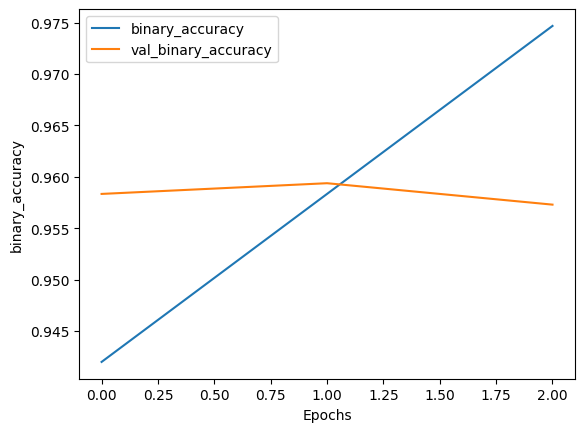

In [29]:
plot_graphs(history, 'binary_accuracy')
# blue: training binary accuracy; orange: validation binary accuracy

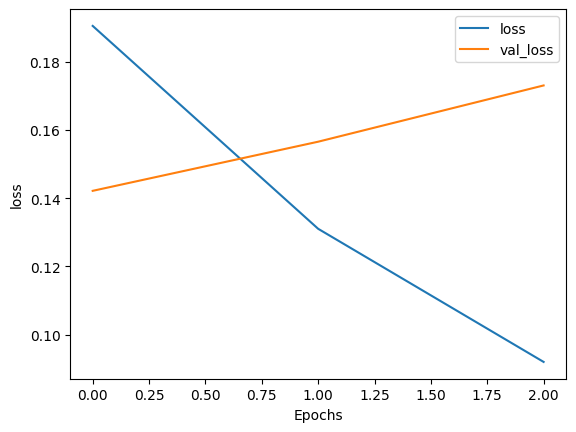

In [30]:
plot_graphs(history, 'loss')
# blue: training loss; orange: validation loss

In [31]:
sample_example = ["What is your email address?",
                  "Are you ashamed of being an Asain?",
                  "I love animals! How about you?",
                  "Does AI engineering have a good future?",
                  "What's your name?",
                  "Can a job interviewer be racist?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

6/6 [==============================] - 1s 23ms/step


In [32]:
threshold = 0.5 #between 0 and 1
['Toxic' if pred >=threshold else 'Sincere' for pred in preds]

['Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere']

The model overfits more. This attempt failed.

## Model Operization Attempt Five: (Augmented on the Third Attempt) Reduce to 1 Training Epoch and the Prediction Threshold (Huge Success!)

In [33]:
# Building the model
def create_model():  #copy-pasted the BERT layers from the BERT documentation
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

#add a dropout layer to minimize overfitting on the training set
  drop = tf.keras.layers.Dropout(0.5)(pooled_output) ##originally 0.4
  output = tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=tf.keras.regularizers.l2(0.01), name="output")(drop) #binary classification ##added L2 regularization

  model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output)
  return model

In [34]:
model = create_model()

#AdamW optimizer with weight decay
optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-5, weight_decay=0.01) #originally 2e-5 #decreased to allow the model to learn more slowly

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

epochs = 1 ## originally 4
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    callbacks=[early_stopping],
                    verbose=1)

306/306 [==============================] - 300s 848ms/step - loss: 0.1503 - binary_accuracy: 0.9512 - val_loss: 0.1451 - val_binary_accuracy: 0.9552


In [37]:
sample_example = ["What is your email address?",
                  "Are you ashamed of being an Asain?",
                  "I love animals! How about you?",
                  "Does AI engineering have a good future?",
                  "What's your name?",
                  "Can a job interviewer be racist?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

6/6 [==============================] - 1s 26ms/step


In [38]:
threshold = 0.5 #between 0 and 1
['Toxic' if pred >=threshold else 'Sincere' for pred in preds]

['Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere', 'Sincere']

In [53]:
threshold = 0.015 #between 0 and 1 # a lower threshold captures the nuances of toxicity much better!!
['Toxic' if pred >=threshold else 'Sincere' for pred in preds]

['Sincere', 'Toxic', 'Sincere', 'Sincere', 'Sincere', 'Toxic']

In [54]:
sample_example = ["Do you hate Trump?",
                  "Are you ashamed of being Taiwanese?",
                  "Why don't you get married?",
                  "Do you like to play basketball?",
                  "Let's discuss about your previous jobs, ok?",
                  "How many moons does Jupiter have?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

6/6 [==============================] - 0s 24ms/step


In [55]:
threshold = 0.015
['Toxic' if pred >=threshold else 'Sincere' for pred in preds]

['Toxic', 'Toxic', 'Toxic', 'Sincere', 'Sincere', 'Sincere']

In [56]:
sample_example = ["May I help you?",
                  "What would you like to drink?",
                  "How can I travel from Sttugart to Paris?",
                  "Aren't old women disgusting?",
                  "Why can women be paid equally as men are?",
                  "Who don't like chocolates?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

6/6 [==============================] - 0s 23ms/step


In [57]:
threshold = 0.015
['Toxic' if pred >=threshold else 'Sincere' for pred in preds]

['Sincere', 'Sincere', 'Sincere', 'Toxic', 'Toxic', 'Sincere']

In [58]:
sample_example = ["Don't you dislike AI?",
                  "How can you not like Trump?",
                  "Isn't Biden too old for president election?",
                  "Aren't old women disgusting?",
                  "Why can women be paid equally as men are?",
                  "Who don't like chocolates?"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)

6/6 [==============================] - 0s 22ms/step


In [59]:
threshold = 0.015
['Toxic' if pred >=threshold else 'Sincere' for pred in preds]

['Toxic', 'Toxic', 'Toxic', 'Toxic', 'Toxic', 'Sincere']

## Yay, huge success!
- loss: 0.1503   - binary_accuracy: 0.9512
- val_loss: 0.1451 - val_binary_accuracy: 0.9552

1. dropout rate lowered from 0.5 to 0.4, i.e., drop = tf.keras.layers.Dropout(0.5)(pooled_output)

2. added an AdamW optimizer with weight decay, i.e., optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-5, weight_decay=0.01)

3. learning rate lowered from 2e-5 to 1e-5

4. epochs lowered from 4 to 1

5. prediction threshold lowered from 0.5 to 0.015
